In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load train dataset
train_path = 'fraudTrain.csv'
df_train = pd.read_csv(train_path)

# Get a quick view on train dataset feature and value
print(df_train.head())

#Load test dataset
test_path = 'fraudTest.csv'
df_test = pd.read_csv(test_path)

# Get a quick view on test dataset feature and value
print(df_test.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [45]:
# Get dataframe shapes
print('Shape of train dataframe:', df_train.shape)
print('Shape of test dataframe:', df_test.shape)

# Get train data info: count, feature names, data types, missing data counts
print('------------------Train Dataframe info------------------')
print(df_train.info())

# Get statistical summaries for each feature
print('------------------Train Dataframe describe------------------')
print(df_train.describe())

Shape of train dataframe: (1296675, 23)
Shape of test dataframe: (555719, 23)
------------------Train Dataframe info------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  obje

In [46]:
# Check uniaue values of is_fraud column
print('\n Unique values:\n', df_train.is_fraud.unique())

# Cound unique values of is_fraud column
print('\n Count unique values:\n', df_train.is_fraud.value_counts())

# Calculate percentage of unique values of is_fraud column
print('\n Percentage of unique values:\n', df_train.is_fraud.value_counts(normalize=True))

# Create dataframe for statistics of fraud labels
df_fraud_stat = pd.DataFrame({'Class': df_train.is_fraud.unique(),
                             'Count': df_train.is_fraud.value_counts(),
                             'Percentage': df_train.is_fraud.value_counts(normalize=True)})
print('\n Dataframe for fraud labels:\n', df_fraud_stat)


 Unique values:
 [0 1]

 Count unique values:
 0    1289169
1       7506
Name: is_fraud, dtype: int64

 Percentage of unique values:
 0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

 Dataframe for fraud labels:
    Class    Count  Percentage
0      0  1289169    0.994211
1      1     7506    0.005789


In [47]:
# Concatenate the two datasets to perform the same data preprocessing
df_combined = pd.concat([df_train, df_test], axis=0)
print('\n Shape of combined dataframe:\n', df_combined.shape)

# Get a list of old feature names
old_feature_names = list(df_train.columns)
print('\n Old feature names:\n', old_feature_names)

# Create a new corresponding feature names
new_feature_names = ['index', 'transaction_time', 'account_number', 'merchant_name', 'category',
       'transaction_amount', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'zip',
       'client_latitude', 'client_longitude', 'city_population', 'job', 'birthday', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud']

# Create a dictionary to map the old feature names to the new ones
feature_name_dict = {old_feature_names[i]: new_feature_names[i] for i in range(len(old_feature_names))}
print('\n Dictionary of old-new feature names:\n', feature_name_dict)

# Edit col/feature name
df_combined = df_combined.rename(columns=feature_name_dict)
print('\n Combine dataframe with new feature names:\n', df_combined.head(2))


 Shape of combined dataframe:
 (1852394, 23)

 Old feature names:
 ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

 Dictionary of old-new feature names:
 {'Unnamed: 0': 'index', 'trans_date_trans_time': 'transaction_time', 'cc_num': 'account_number', 'merchant': 'merchant_name', 'category': 'category', 'amt': 'transaction_amount', 'first': 'first_name', 'last': 'last_name', 'gender': 'gender', 'street': 'street', 'city': 'city', 'state': 'state', 'zip': 'zip', 'lat': 'client_latitude', 'long': 'client_longitude', 'city_pop': 'city_population', 'job': 'job', 'dob': 'birthday', 'trans_num': 'transaction_number', 'unix_time': 'unix_time', 'merch_lat': 'merchant_latitude', 'merch_long': 'merchant_longitude', 'is_fraud': 'is_fraud'}

 Combine dataframe with new feature names:
    index     tr

In [48]:
import numpy as np
# Convert transaction_time from string to datetime type. Add transaction date, hour, month to combined dataframe
df_combined.transaction_time = pd.to_datetime(df_combined.transaction_time)
df_combined['transaction_date'] = df_combined.transaction_time.dt.strftime('%Y-%m-%d')
df_combined['transaction_hour'] = df_combined.transaction_time.dt.strftime('%H')
df_combined['transaction_month'] = df_combined.transaction_time.dt.strftime('%m')

# Convert transaction_birthday from string to datetime type. Add 'birthday_date' and 'age' features to combined dataframe
df_combined.birthday = pd.to_datetime(df_combined.birthday)
df_combined['birthday_date'] = df_combined.birthday.dt.strftime('%Y-%m-%d')
df_combined['age'] = (df_combined.transaction_time - df_combined.birthday).astype('timedelta64[Y]')

# calculate transaction distance 
distance_trans_longitude = df_combined.merchant_longitude - df_combined.client_longitude
distance_trans_lattitude = df_combined.merchant_latitude - df_combined.client_latitude
distance_trans = np.sqrt(distance_trans_longitude**2 + distance_trans_lattitude**2)

# Add distance features to combined dataframe
df_combined['transaction_longitude_distance'] = distance_trans_longitude
df_combined['transaction_lattitude_distance'] = distance_trans_lattitude
df_combined['transaction_distance'] = distance_trans

# Create age_interval function
def age_interval(x):
    """
    Binning age values to categorical ones with 5 categories:
    'Less than 20', 'Between 20 and 30', 'Between 30 and 40', 
    'Between 40 and 50', 'Between 50 and 60' and 'Larger than 60'
    """
    if x < 20:
        return "Less than 20" 
    elif x >=20 and x < 30:
        return "Between 20 and 30"
    elif x >=30 and x < 40:
        return "Between 30 and 40"
    elif x >=40 and x < 50:
     return "Between 40 and 50"
    elif x >=50 and x < 60:
        return "Between 50 and 60"
    else: 
        return "Larger than 60"

# Create rename function for gender feature
def gender_rename(x):
    """
        Rename gender value: 'M' to 'Male' 
        and 'F' to 'Female'
    """
    if x == 'M':
        return "Male" 
    else: 
        return "Female"
    
# Create 'age_intervals' 
df_combined['age_intervals'] = df_combined.age.map(lambda x : age_interval(x))

# Rename gender values
df_combined['gender'] = df_combined.gender.map(lambda x : gender_rename(x))  

In [49]:
# Get the length of the train dataset
train_samples_len = df_train.shape[0]

# Get preprocessed train and test dataframes
df_train_preprocessed = df_combined.iloc[:train_samples_len, :]
df_test_preprocessed = df_combined.iloc[train_samples_len:, :]

# Save the preprocessed dataframes into new corresponding csv files
df_train_preprocessed.to_csv('C:/Users/Vishnunakka/Desktop/credit-card-fraud-dectection/app/df_train_preprocessed.csv')
df_test_preprocessed.to_csv('C:/Users/Vishnunakka/Desktop/credit-card-fraud-dectection/app/df_test_preprocessed.csv')

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed train dataset
data_train_path = 'C:/Users/Vishnunakka/Desktop/credit-card-fraud-dectection/app/df_train_preprocessed.csv'
df = pd.read_csv(data_train_path)

# Get preprocessed train dataframe dedicated to fraud observations
df_fraud = df[df['is_fraud'] == 1]

# Display the shape of the datasets
print('Shape for preprocessed train dataset: \n', df.shape)
print('Shape for only-fraud train dataset: \n', df_fraud.shape)

Shape for preprocessed train dataset: 
 (1296675, 33)
Shape for only-fraud train dataset: 
 (7506, 33)


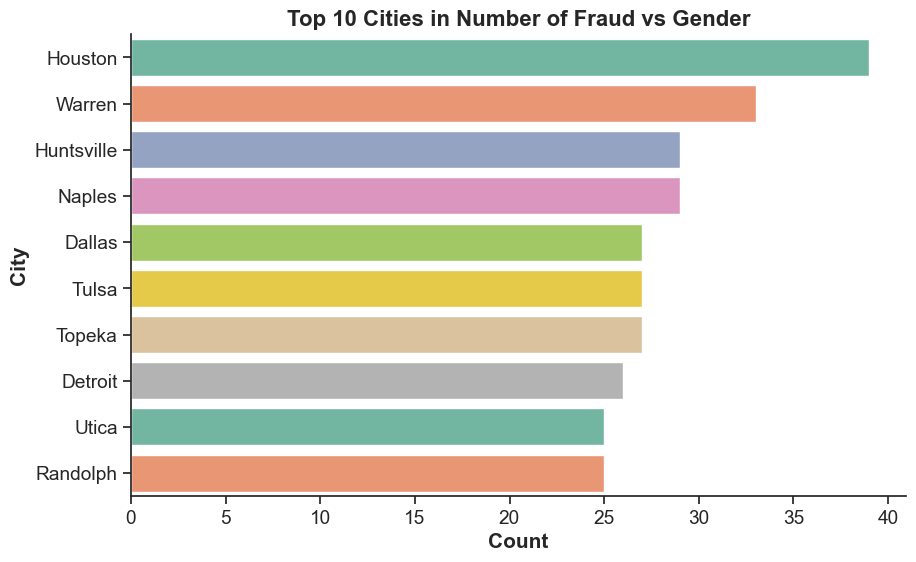

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assuming df_fraud is the dataset containing only fraud data
city_counts = df_fraud['city'].value_counts().head(10)  # Top 10 cities based on fraud count

# Create a barplot with the count of fraud data by city
fig = plt.figure(figsize=(10, 6))

# Customize the theme and color palette
colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot for top 10 cities based on fraud, split by gender
sns.barplot(y=city_counts.index, x=city_counts.values, palette='Set2', orient='h')

# Set title, labels, and legend properties
plt.title('Top 10 Cities in Number of Fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('City', fontsize=15, fontweight='bold')

# Show the plot
plt.show()

# Ensure the directory exists before saving the plot
output_directory = './figs'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot as a PNG file with 300 dpi
fig.savefig(f'{output_directory}/Top_10_Cities_in_Fraud_vs_Gender.png', dpi=300, bbox_inches='tight')

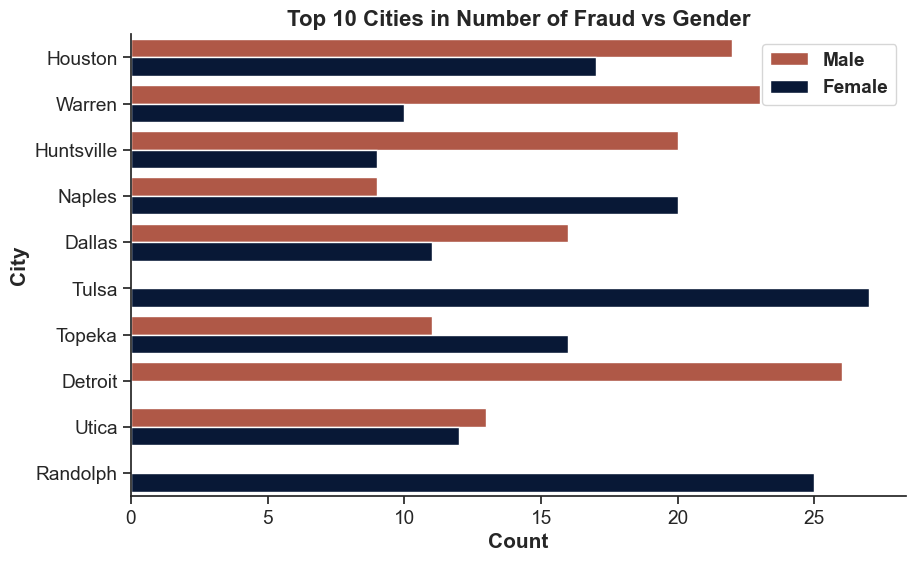

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_fraud is the dataset containing only fraud data
fig = plt.figure(figsize=(10,6))

# Customize theme, color palette, and plot settings
colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot for top 10 cities based on fraud, split by gender
g = sns.countplot(y='city',  # Ensure 'city' is a valid column in df_fraud
                  data=df_fraud,
                  hue='gender',  # Ensure 'gender' is a valid column
                  order=df_fraud['city'].value_counts().head(10).index)  # Get top 10 cities by fraud count

# Set title, labels, and legend
g.set_title('Top 10 Cities in Number of Fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('City', fontsize=15, fontweight='bold')
g.legend(prop={'weight': 'bold'})

# Show the plot
plt.show()

# Optionally save the plot as a PNG file with 300 dpi
fig.savefig('./figs/Top_10_Cities_in_Fraud_vs_Gender.png', dpi=300, bbox_inches='tight')

In [53]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check column names again
print(df.columns)

# Convert transaction_time to datetime format
df["transaction_time"] = pd.to_datetime(df["transaction_time"])

# Convert datetime to Unix timestamp (seconds since 1970-01-01)
df["unix_time"] = df["transaction_time"].apply(lambda x: x.timestamp()).astype(int)

# Drop original transaction_time column (optional)
df.drop(columns=["transaction_time"], inplace=True)

# Save the updated dataset
df.to_csv("df_train_preprocessed.csv", index=False)

print("Successfully converted transaction_time to Unix timestamp!")



Index(['Unnamed: 0', 'index', 'transaction_time', 'account_number',
       'merchant_name', 'category', 'transaction_amount', 'first_name',
       'last_name', 'gender', 'street', 'city', 'state', 'zip',
       'client_latitude', 'client_longitude', 'city_population', 'job',
       'birthday', 'transaction_number', 'unix_time', 'merchant_latitude',
       'merchant_longitude', 'is_fraud', 'transaction_date',
       'transaction_hour', 'transaction_month', 'birthday_date', 'age',
       'transaction_longitude_distance', 'transaction_lattitude_distance',
       'transaction_distance', 'age_intervals'],
      dtype='object')
Successfully converted transaction_time to Unix timestamp!


In [54]:
print(df.dtypes)
df.drop(columns=["transaction_number", "transaction_date"], inplace=True)



Unnamed: 0                          int64
index                               int64
account_number                      int64
merchant_name                      object
category                           object
transaction_amount                float64
first_name                         object
last_name                          object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
client_latitude                   float64
client_longitude                  float64
city_population                     int64
job                                object
birthday                           object
transaction_number                 object
unix_time                           int32
merchant_latitude                 float64
merchant_longitude                float64
is_fraud                            int64
transaction_date                  

In [55]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ["merchant_name", "category", "gender", "city", "state", "job", "age_intervals"]

# Apply Label Encoding
label_encoders = {}  # Store encoders for later use

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numbers
    label_encoders[col] = le  # Save encoder for future use (e.g., on test data)


In [56]:
df["birthday"] = pd.to_datetime(df["birthday"])
df["age"] = (pd.Timestamp.today() - df["birthday"]).dt.days // 365  # Convert to years

# Drop original birthday column
df.drop(columns=["birthday"], inplace=True)


In [57]:
#print(df.dtypes)
df.drop(columns=["index", "account_number", "first_name", "last_name", "street", "birthday_date"], inplace=True)
df.to_csv("df_train_cleaned.csv", index=False)
print("✅ Dataset cleaned! Ready for model training.")
print(df.dtypes)


✅ Dataset cleaned! Ready for model training.
Unnamed: 0                          int64
merchant_name                       int32
category                            int32
transaction_amount                float64
gender                              int32
city                                int32
state                               int32
zip                                 int64
client_latitude                   float64
client_longitude                  float64
city_population                     int64
job                                 int32
unix_time                           int32
merchant_latitude                 float64
merchant_longitude                float64
is_fraud                            int64
transaction_hour                    int64
transaction_month                   int64
age                                 int64
transaction_longitude_distance    float64
transaction_lattitude_distance    float64
transaction_distance              float64
age_intervals                  

In [58]:
# Define features and target
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
}

# Save the trained model
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model training complete!")
print(metrics)


Model training complete!
{'accuracy': 0.9984151772803517, 'precision': 0.9805996472663139, 'recall': 0.7408394403730846, 'f1_score': 0.8440227703984818}


In [61]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred), 
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
}

# Print evaluation results
print("Model Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Model Evaluation Metrics:
accuracy: 0.9984
precision: 0.9806
recall: 0.7408
f1_score: 0.8440


In [62]:
import pickle
import pandas as pd

# Load the trained fraud detection model
with open("fraud_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)


In [66]:
# Define a manual transaction with the same 22 features
manual_data = {
    "Unnamed: 0": 999,  # Random ID
    "merchant_name": 520,  
    "category": 3,  
    "transaction_amount": 250.75,  
    "gender": 1,  
    "city": 600,  
    "state": 20,  
    "zip": 12345,  
    "client_latitude": 37.7749,  
    "client_longitude": -122.4194,  
    "city_population": 500000,  
    "job": 100,  
    "unix_time": 1670000000,  
    "merchant_latitude": 37.7812,  
    "merchant_longitude": -122.4111,  
    "is_fraud": 0,  # This will not be used for prediction
    "transaction_hour": 15,  
    "transaction_month": 7,  
    "age": 29,  
    "transaction_longitude_distance": -0.0083,  
    "transaction_lattitude_distance": 0.0063,  
    "transaction_distance": 1.05,  
    "age_intervals": 2  
}

# Convert to DataFrame
manual_df = pd.DataFrame([manual_data])

# Drop 'is_fraud' column (as it is the target variable, not a feature)
manual_df = manual_df.drop(columns=["is_fraud"])


In [68]:


# Reorder columns to match model input
manual_df = manual_df[expected_features]

# Make prediction
prediction = model.predict(manual_df)[0]

# Print the result
print(f"Fraud Prediction: {'Fraud' if prediction == 1 else 'Not Fraud'}")


Fraud Prediction: Fraud


c:\Users\Vishnunakka\anaconda3\anaconda1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
